# Pattern Recognition and Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import gamma
plt.style.use("seaborn")

from itertools import product

In [2]:
from itertools import combinations_with_replacement
import sympy
sympy.init_printing()

### Exercise 1.15
The $M$-th order term for a $D$-dimensional polynomial is given by
$$
    \sum_{i_1=1}^D \sum_{i_2=1}^D \dots \sum_{i_M=1}^D w_{i_1,i_2,\ldots,i_M}x_{i_1}x_{i_2}\ldots x_{i_M}
$$
Show that we can rewrite the last expresion by removing redundant terms in the form:
$$
    \sum_{i_1=1}^D \sum_{i_2=1}^{i_1} \dots \sum_{i_M=1}^{i_{M-1}} \tilde w_{i_1,i_2,\ldots,i_M}x_{i_1}x_{i_2}\ldots x_{i_M}
$$

Note: the number of independent parameters is significantly fewer due to the many interchange symmetries of the factor $x_{i_1}x_{i_2}\ldots x_{i_M}$

In [2]:
terms = range(1, 4)
i, j, k = symbols("i j k", integer=True)
what = IndexedBase("\hat{w}")
x = IndexedBase("x")

In [3]:
def extract(iterable: list, elements: list) -> list:
    """
    Extract and convert elements from a multi-level
    list into a 1D list
    """
    for el in iterable:
        if type(el) == list:
            extract(el, elements)
        else:
            elements.append(el)
    return elements

In [4]:
def term2d(i, j): return Indexed("\hat{w}", i, j) * Indexed("x", i) * Indexed("x", j)
def term3d(i, j, k): return Indexed("\hat{w}", i, j, k) * Indexed("x", i) * Indexed("x", j) * Indexed("x", k)

#### For $D=2$, $M=3$

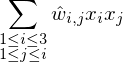

In [5]:
Sum(term2d(i, j), (i, 1, 3), (j, 1, i))

In [6]:
elements = [[term2d(i, j) for j in range(1, i + 1)] for i in terms]
simple_term = sum(extract(elements, []))
simple_term

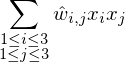

In [17]:
Sum(term2d(i, j), (i, 1, 3), (j, 1, 3))

In [8]:
full_term =  summation(term2d(i, j), (i, 1, 3), (j, 1, 3))
full_term

In [9]:
replacement = {what[x, y]: what[y, x] for x, y in ([2, 1], [3, 1], [3, 2])}
full_term.xreplace(replacement) 

In [10]:
collect(full_term, [x[1]*x[2], x[1] * x[3], x[2] * x[3]])

-------

#### For $D=3$, $M=3$

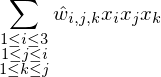

In [11]:
Sum(term3d(i, j, k), (i, 1, 3), (j, 1, i), (k, 1, j))

In [12]:
elements = [[[term3d(i, j, k) for k in range(1, j + 1)] for j in range(1 + i)] for i in terms]
simple_term = sum(extract(elements, []))
simple_term

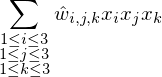

In [13]:
Sum(term3d(i, j, k), (i, 1, 3), (j, 1, 3), (k, 1, 3))

In [14]:
full_term = summation(term3d(i, j, k), (i, 1, 3), (j, 1, 3), (k, 1, 3))
full_term

In [16]:
groupping = [x[a] *  x[b] * x[c] for a, b, c in combinations_with_replacement([1, 2, 3], r=3)]
collect(full_term, groupping, exact=True)

### Exercise 1.18
By considering
$$
    \prod_{i=1}^D \int_{-\infty}^{\infty}e^{-x_i^2} dx_i = S_D \int_{0}^\infty e^{-r^2}r^{D-1}dr
$$

We can show that the surface area $S_D$ and the volume $V_D$ of a unit radius in $D$ dimensions is given by

$$
    S_D = \frac{2\pi^{D/2}}{\Gamma(D/2)}
$$

$$
    V_D = \frac{S_D}{D}
$$

In [2]:
D = np.linspace(0.1, 20, 1000)
Sd = 2 * np.pi * D / gamma(D / 2)
Vd = Sd / D

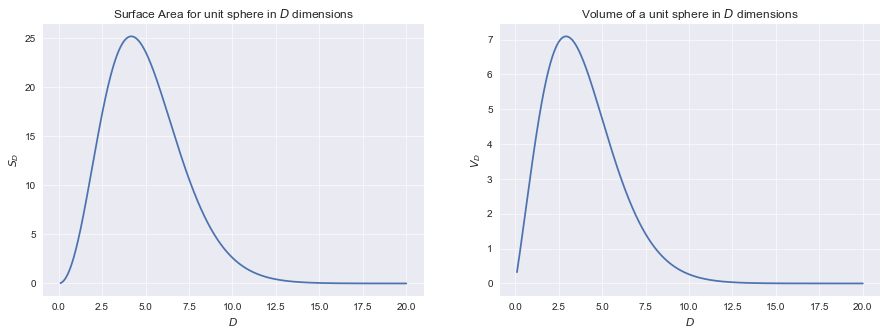

In [9]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(D, Sd)
ax.set_title("Surface Area for unit sphere in $D$ dimensions")
ax.set_xlabel("$D$")
ax.set_ylabel("$S_D$")
ax.grid(alpha=0.6)

ax = fig.add_subplot(1, 2, 2)
ax.plot(D, Vd)
ax.set_title("Volume of a unit sphere in $D$ dimensions")
ax.set_xlabel("$D$")
ax.set_ylabel("$V_D$")
ax.grid(alpha=0.6)

### Exercise 1.20
By considering
$$
    p(\mathbf{x}) = \frac{1}{\left(2\pi\sigma^2\right)^{D/2}}\exp{\left(-\frac{||\mathbf{x}||^2}{2\sigma^2}\right)}
$$

Show that the integralof the probability density over a thin shell of radius $r$ and thickness $\varepsilon$, where $\varepsilon \ll 1$, is given by $p(r)\varepsilon$ where

$$
    p(r) = \frac{S_Dr^{D-1}}{\left(2\pi\sigma^2\right)^{D/2}}\exp\left(-\frac{-r^2}{2\sigma^2}\right)
$$

In [2]:
import sympy
from sympy import cos, sin
t1, t2, t3, r = sympy.symbols("theta1 theta2 theta3 r")
x1 = r * cos(t1)
x2 = r * sin(t1) * cos(t2)
x3 = r * sin(t1) * sin(t2) * cos(t3)
x4 = r * sin(t1) * sin(t2) * sin(t3)

In [3]:
X2 = sum([x**2 for x in [x1, x2, x3, x4]])
X2

r**2*sin(theta1)**2*sin(theta2)**2*sin(theta3)**2 + r**2*sin(theta1)**2*sin(theta2)**2*cos(theta3)**2 + r**2*sin(theta1)**2*cos(theta2)**2 + r**2*cos(theta1)**2

In [4]:
X2.simplify()

r**2

### Exercise 1.27
Consider the expected loss for regression problems underr the $L_q$ loss function
$$
    \mathbb{E}[L_q] = \int\int |y(x) - t|^q p(x, t) \ dx dt
$$

----
Since we can choose $y(x)$ independently of $x$, the minimum of $\mathbb{E}[L_q]$ can be found by minimizing the function in a pointwise manner

$$
\begin{align}
\arg\min\mathbb{E}[L_q] &= \arg\min \int |y(x) - t|^q p(x, t) dt \\
                        &= \arg\min \int |y(x) - t|^q p(t|x)p(x) dt \\
                        &= \arg\min \int |y(x) - t|^q p(t|x) dt \\
\end{align}
$$

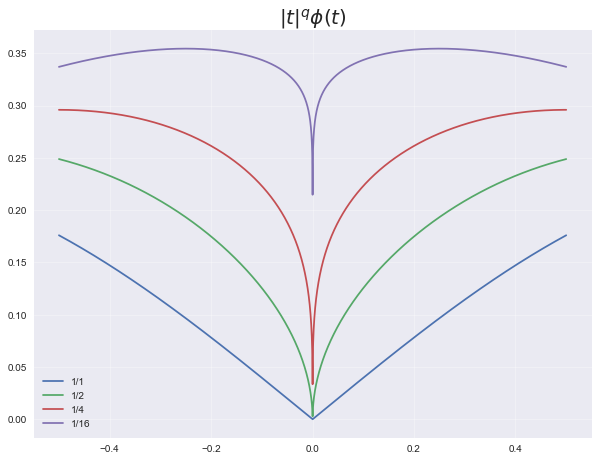

In [6]:
t = np.linspace(-0.5, 0.5, 10000)
plt.figure(figsize=(10, 7.5))
plt.title(r"$|t|^q \phi(t)$", size=20)
for q in [1, 2, 4, 16]:
    plt.plot(t, np.abs(t) ** (1 / q) * norm.pdf(t) , label=f"1/{q}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Exercise 1.30

Evaluate the Kullback-Leibler divergence between two gaussians.

$$
    KL(p||q) = -\int p(x) \log{\frac{q(x)}{p(x)}} dx
$$

where 
* $p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$
* $q(x) = \frac{1}{\sqrt{2\pi s^2}}e^{-\frac{1}{2 s^2}(x - m)^2}$

We can divide up $-p(x) \log{\frac{q(x)}{p(x)}}$ into $\frac{1}{2}(A + B + C)$; where

$$
    A = -\log\left(\frac{\sigma^2}{s^2}\right)\mathcal{N}(x | \mu, \sigma^2)
$$

$$
    B = -\mathcal{N}(x | \mu, \sigma^2)\left(\frac{1}{\sigma^2}(x - \mu)^2\right)
$$

$$
    C = \mathcal{N}(x | \mu, \sigma^2)\left(\frac{1}{s^2}(x - m)^2\right)
$$

In [1]:
from ipywidgets import interact, FloatSlider, Dropdown
from scipy.integrate import quad
from scipy.stats import norm

mu, sigma2 = 1, 1
m, s2 = 2, 2

After integrating all terms, we conclude:
$$
    KL\left(\mathcal{N}(\mu, \sigma^2)||\mathcal{N}(m, s^2)\right) = \frac{1}{2}\left(\frac{1}{s^2}\left(\sigma^2 + (\mu - m)^2\right) - \log\left(\frac{\sigma^2}{s^2}\right) - 1\right)
$$

In [6]:
# Integral approximation
def kl(x, mu, sigma2, m, s2): return -norm.pdf(x, loc=mu, scale=np.sqrt(sigma2)) * \
                                      np.log(norm.pdf(x, loc=m, scale=np.sqrt(s2)) / \
                                             norm.pdf(x, loc=mu, scale=np.sqrt(sigma2)))
quad(kl, -10, 10, (mu, sigma2, m, s2))

(0.34657359027997275, 1.1377960462583034e-09)

In [7]:
# Exact solution
def kld(mu, sigma2, m, s2): return ((sigma2 + (mu - m) ** 2) / s2 - np.log(sigma2 / s2) - 1) / 2
kld(mu, sigma2, m, s2)

0.3465735902799727

In [8]:
def plot_kld(mu, sigma2, m, s2, along):
    figure, ax = plt.subplots(1, 2, figsize=(20, 7))
    if along in ["mu", "m"]:
        xrange = np.linspace(-2, 2)
        yrange = kld(xrange, sigma2, m, s2) if along == "mu" else kld(mu, sigma2, xrange, s2)
    elif along in ["sigma2", "s2"]:
        xrange = np.linspace(0.1, 2)
        yrange = kld(mu, xrange, m, s2) if along == "sigma2" else kld(mu, sigma2, m, xrange)

    xmin = -2 if along in ["mu", "m"] else 0
    ax[0].vlines(x=eval(along), ymin=0, ymax=2, linestyle="dashed")
    ax[0].hlines(y=kld(mu, sigma2, m, s2), xmin=xmin, xmax=2, linestyle="dashed")
        
    ax[0].set_xlabel(along)
    ax[0].plot(xrange, yrange)
    ax[0].set_ylim(0, 2)
    ax[0].set_title(f"$KL(p||q)={kld(mu, sigma2, m, s2):0.3f}$")
    xrange = np.linspace(-3, 3, 100)
    ax[1].plot(xrange, norm.pdf(xrange, mu, sigma2), label=f"mu={mu}  sigma2={sigma2}")
    ax[1].plot(xrange, norm.pdf(xrange, m, s2), label=f"mu={m}  sigma2={s2}")
    ax[1].legend(fontsize="x-large")
    
interact(plot_kld,
         mu=FloatSlider(value=0, min=-2, max=2, step=0.1),
         sigma2=FloatSlider(value=1, min=0.1, max=2, step=0.1),
         m=FloatSlider(value=0, min=-2, max=2, step=0.1),
         s2=FloatSlider(value=1, min=0.1, max=2, step=0.1),
         along=Dropdown(options=["mu", "m", "sigma2", "s2"]));

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

Using proof by induction, show that the inequality 
$$
    f\left(\theta x + (1 - \theta) y\right) \leq \theta f(x) + (1 - \theta) f(y)
$$
for convex functions implies
$$
    f\left(\sum_i \theta_i x_i\right) \leq \sum_i\theta_i f(x_i)
$$


For $\{x_i\}_i \in \text{dom}(f)$ and $\sum_i \theta_i = 1$

In [26]:
plt.style.use("seaborn")

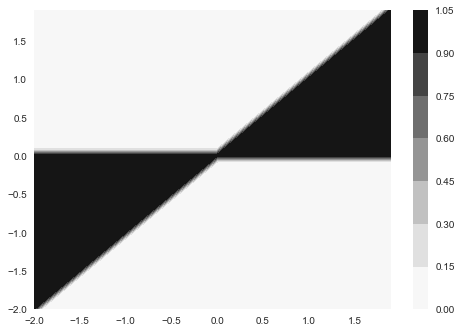

In [27]:
kdef f(x): return x**2
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)

x1, x2 = np.mgrid[-2:2:0.1, -2:2:0.1]
plt.contourf(x1, x2, f(x1 - x2) <= f(x1) - f(x2))
plt.colorbar()

### Exercise 1.39
Consider the two binary variables $x$ and $y$ having the following joint relationship

x\y | 0 | 1
---|---|----
0 | 0 | 1 / 3
1 | 1/3 | 1/3

Evaluate the following quantities:
* $H[x]$
* $H[y]$
* $H[y|x]$
* $H[x|y]$
* $H[x, y]$
* $I[x, y]$

We first note that

In [12]:
def P(x, y):
    if x == 0 and y == 0:
        return 0
    if x == 1 and y == 1:
        return 1 / 3
    if x == 1 and y == 0:
        return 1 / 3
    if x == 0 and y == 1:
        return 1 / 3
    
# Since P(x=x.) = P(x=x., y=0) + P(x=x., y=1) 
def Px(x): return P(x=x, y=0) + P(x=x, y=1)
def Py(y): return P(x=0, y=y) + P(x=1, y=y)
def Px_giv_y(x, y): return P(x=x, y=y)  / Py(y=y)
def Py_giv_x(x, y): return P(x=x, y=y)  / Px(x=x)

In [13]:
print(f"P(x=0) = {Px(x=0):0.3%}")
print(f"P(x=1) = {Px(x=1):0.3%}")
print()
print(f"P(y=0) = {Py(y=0):0.3%}")
print(f"P(y=1) = {Py(y=1):0.3%}")
print()
print(f"P(x=0|y=0) = {Px_giv_y(x=0, y=0):0.3%}")
print(f"P(x=1|y=0) = {Px_giv_y(x=1, y=0):0.3%}")
print()
print(f"P(y=0|x=1) = {Py_giv_x(y=0, x=1):0.3%}")
print(f"P(y=1|x=1) = {Py_giv_x(y=1, x=1):0.3%}")

P(x=0) = 33.333%
P(x=1) = 66.667%

P(y=0) = 33.333%
P(y=1) = 66.667%

P(x=0|y=0) = 0.000%
P(x=1|y=0) = 100.000%

P(y=0|x=1) = 50.000%
P(y=1|x=1) = 50.000%


In [14]:
Hx = -(np.log(Px(0)) * Px(0) + np.log(Px(1)) * Px(1)); Hx

0.6365141682948128

In [15]:
Hy = -(np.log(Py(0)) * Py(0) + np.log(Py(1)) * Py(1)); Hx

0.6365141682948128

$$
\begin{align}
    H[x|y] &= -\sum_i\sum_j P(x=i, y=j) \log P(x=i|y=j) \\
\end{align}
$$

In [16]:
def log(x): return 0 if x == 0 else np.log(x)

In [21]:
Hx_giv_y = -(log(P(x=0, y=0)) * Px_giv_y(x=0, y=0) +\
             log(P(x=1, y=0)) * Px_giv_y(x=1, y=0) +\
             log(P(x=0, y=1)) * Px_giv_y(x=0, y=1) +\
             log(P(x=1, y=1)) * Px_giv_y(x=1, y=1))
Hx_giv_y

2.1972245773362196

In [24]:
Hy_giv_x = -(log(P(x=0, y=0)) * Py_giv_x(x=0, y=0) +\
             log(P(x=1, y=0)) * Py_giv_x(x=1, y=0) +\
             log(P(x=0, y=1)) * Py_giv_x(x=0, y=1) +\
             log(P(x=1, y=1)) * Py_giv_x(x=1, y=1))
Hy_giv_x

2.1972245773362196

In [25]:
Hxy = -(log(P(x=0, y=0)) * P(x=0, y=0) +\
        log(P(x=1, y=0)) * P(x=1, y=0) +\
        log(P(x=0, y=1)) * P(x=0, y=1) +\
        log(P(x=1, y=1)) * P(x=1, y=1))
Hxy

1.0986122886681096

We define the mutual information between two r.vs $x$ and $y$ as
$$
I[x, y] = \text{KL}(p(x, y)||p(x)p(y))
$$
Where,
$$
    \text{KL}(p, q) = -\int p(x) \log\frac{q(x)}{p(x)} dx
$$

Then,
$$
\text{KL}(p(x,y)||p(x)p(y)) = -\int\int p(x, y) \log\left(\frac{p(x)p(y)}{p(x, y)}\right)dx dy
$$

In [26]:
Ixy = -sum([P(x=x, y=y) * log(Px(x=x) * Py(y=y) / P(x=x, y=y)) for x, y in product([0,1],[0,1]) if P(x, y) != 0])
Ixy

0.174416047921516